In [1]:
################### standard ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################### allow import from src ###################
import sys, os
sys.path.append(os.path.abspath(".."))

################### pipeline step ###################
from src.data_prep import prepare_monthly_dataset_onehot
from src.config import feature_def
from src.models.linear_onehot_pipeline import run_onehot_linear_pipeline
from src.models import utils


In [2]:
monthly_onehot = prepare_monthly_dataset_onehot("../data/Major_Crime_Indicators_Open_Data.csv")

,NEIGHBOURHOOD_158,REPORT_YEAR,REPORT_MONTH,TotalCrimeScore,Crime_Count,x,y,NSI,Prev_Month_NSI,NSI_3M_Avg
0,Agincourt North (129),2014,4,42,11,-8.824712e+06,5.435661e+06,0.914405,0.918580,0.885873
8,Agincourt North (129),2014,5,29,8,-8.823638e+06,5.436439e+06,0.941545,0.914405,0.901183
6,Agincourt North (129),2014,6,63,17,-8.824837e+06,5.435397e+06,0.870564,0.941545,0.924843
5,Agincourt North (129),2014,7,52,13,-8.824463e+06,5.435727e+06,0.893528,0.870564,0.908838
1,Agincourt North (129),2014,8,62,16,-8.824389e+06,5.435626e+06,0.872651,0.893528,0.901879


In [3]:
numeric_cols = feature_def.FEATURE_NSI_3M_NUMERIC
target_col = feature_def.TARGET_COL

model, y_test, y_pred, metrics, feature_cols, df_onehot = run_onehot_linear_pipeline(
    csv_path="../data/Major_Crime_Indicators_Open_Data.csv",
    numeric_feature_cols=numeric_cols,
    target_col=target_col,
    scale=True
)
metrics

{'R2': 0.8178496500005907,
 'MAE': 0.03926940503017015,
 'MSE': 0.0030498099295554674,
 'RMSE': 0.05522508424217629}

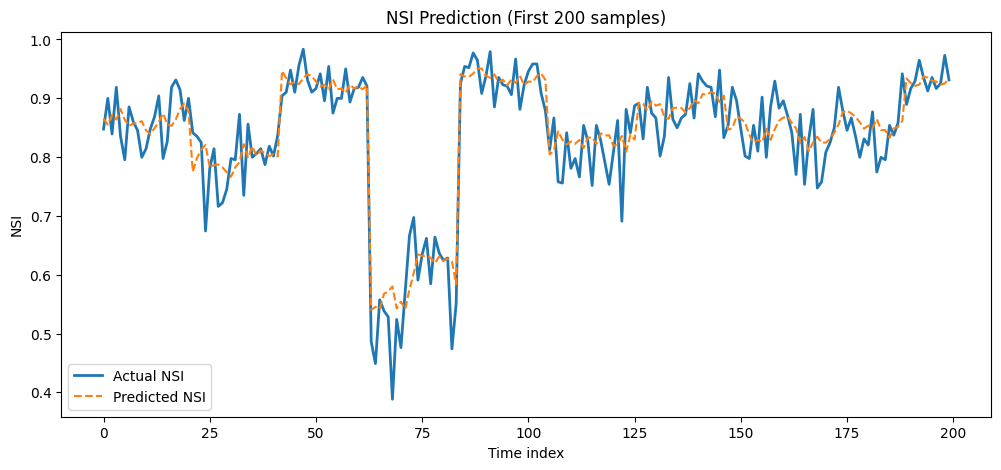

In [4]:
utils.plot_predictions(y_test, y_pred, 200)